# EDSA Apple Price Challenge

## Problem background
Imagine you are in the Fresh Produce Industry. How much stock do you have on hand? Not too little that you run out of stock when customers want to buy more. And not too much that food waste occurs. How do you set your prices? Yields from farms fluctuate by season. Should your prices then also fluctuate by season?

We want to construct a regression algorithm, capable of accurately predicting how much a kilogram of Golden Delicious Apples will cost, given certain parameters.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being able to accurately determine how much stock to have on hand and what price to set the Golden Delicious Apples to.

# Contents of notebook
1. Data cleaning and formatting
2. Exploratory data analysis
3. Feature engineering and selection
4. Model selection and evaluation
5. Model results
6. Conclusion

# Importing Libraries

In [255]:
#Regression models
from sklearn.linear_model import LinearRegression

#Model selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error

#Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

#Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#Visualisations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Other
import numpy as np
import pandas as pd
from scipy import stats
import math
import pickle
import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [256]:
train = pd.read_csv('https://raw.githubusercontent.com/onkarabiletshele/Regression_AM6_DSFT/main/Data/df-train_set.csv')
test = pd.read_csv('https://raw.githubusercontent.com/onkarabiletshele/Regression_AM6_DSFT/main/Data/df-test_set.csv')
sample_submission = pd.read_csv('https://raw.githubusercontent.com/onkarabiletshele/Regression_AM6_DSFT/main/Data/sample_submission.csv')
index = test['Index']
test = test.drop('Index', axis=1)

# 1. Data cleaning and formatting

Filtering the data because we want to focus on Apple Golden Delicious only!

In [257]:
train = train[train['Commodities']=='APPLE GOLDEN DELICIOUS']

In [258]:
train.head()

Province Container Size_Grade  Weight_Kg  \
1                   CAPE     M4183         1L       18.3   
7                   CAPE     JG110         2M       11.0   
24  W.CAPE-BERGRIVER ETC     JE090         2S        9.0   
40                  CAPE     M4183         1S       18.3   
69          EASTERN CAPE     IA400         1S      400.0   

               Commodities        Date  Low_Price  High_Price  Sales_Total  \
1   APPLE GOLDEN DELICIOUS  2020-09-09      150.0       170.0      51710.0   
7   APPLE GOLDEN DELICIOUS  2020-04-14       50.0        50.0      16000.0   
24  APPLE GOLDEN DELICIOUS  2020-04-16       55.0        55.0        990.0   
40  APPLE GOLDEN DELICIOUS  2020-05-04       80.0       120.0      32020.0   
69  APPLE GOLDEN DELICIOUS  2020-09-28     1800.0      1800.0       1800.0   

    Total_Qty_Sold  Total_Kg_Sold  Stock_On_Hand  avg_price_per_kg  
1              332         6075.6            822              8.51  
7              320         3520.0              0              4.55  
24              18          162.0           1506              6.11  
40             388         7100.4            443              4.51  
69               1          400.0              2              4.50

In [259]:
train.describe()

Weight_Kg    Low_Price   High_Price    Sales_Total  Total_Qty_Sold  \
count  1952.000000  1952.000000  1952.000000    1952.000000     1952.000000   
mean     40.460912   174.307377   215.648053   20053.533811      174.510758   
std      99.655169   373.553578   433.546159   39005.069445      308.810797   
min       3.000000     2.000000     5.000000       5.000000        1.000000   
25%       9.000000    50.000000    60.000000    1325.000000       12.000000   
50%      12.000000    80.000000   108.000000    5495.000000       64.000000   
75%      18.300000   127.250000   160.000000   21082.500000      200.000000   
max     400.000000  2300.000000  3300.000000  369464.000000     4237.000000   

       Total_Kg_Sold  Stock_On_Hand  avg_price_per_kg  
count    1952.000000    1952.000000       1952.000000  
mean     2960.176332     408.393955          6.778893  
std      6097.416527     724.450582          2.248744  
min         3.000000       0.000000          0.250000  
25%       219.600000       9.000000          5.460000  
50%       853.500000     126.500000          6.670000  
75%      3093.525000     468.000000          8.280000  
max     74000.000000    6400.000000         21.240000

In [261]:
# Checking for correct data types 
train.dtypes

Province             object
Container            object
Size_Grade           object
Weight_Kg           float64
Commodities          object
Date                 object
Low_Price           float64
High_Price          float64
Sales_Total         float64
Total_Qty_Sold        int64
Total_Kg_Sold       float64
Stock_On_Hand         int64
avg_price_per_kg    float64
dtype: object

In [262]:
# need to change date datatype

### Checking the distribution 

<AxesSubplot:xlabel='avg_price_per_kg', ylabel='Density'>

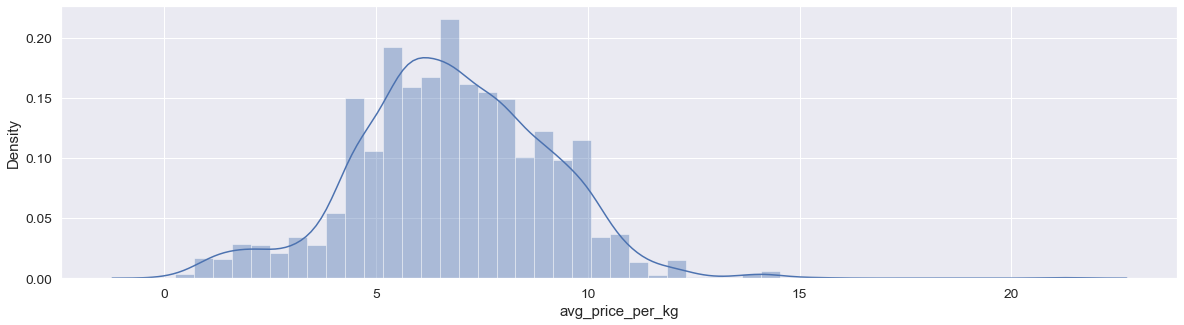

In [263]:
fig, ax = plt.subplots(figsize=(20,5))
sns.distplot(train['avg_price_per_kg'], kde=True)

# 2. Exploratory data analysis

### 2.1 Identifying missing values

In [264]:
# missing values
def missing_values_table(df):
        mis_val = df.isnull().sum()
        
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [265]:
missing_values_table(train)

Your selected dataframe has 13 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

## 2.2 Exploring the correlation of the target variable and predictor variables

In [150]:
# Checking for correlation between target  variable and numerical variables
train.corr()

Weight_Kg  Low_Price  High_Price  Sales_Total  \
Weight_Kg          1.000000   0.863182    0.905852     0.180518   
Low_Price          0.863182   1.000000    0.938140     0.183230   
High_Price         0.905852   0.938140    1.000000     0.265672   
Sales_Total        0.180518   0.183230    0.265672     1.000000   
Total_Qty_Sold    -0.133317  -0.122823   -0.096456     0.771865   
Total_Kg_Sold      0.294117   0.269744    0.372282     0.962338   
Stock_On_Hand     -0.144105  -0.127677   -0.094174     0.284693   
avg_price_per_kg  -0.337886  -0.141740   -0.164496     0.108473   

                  Total_Qty_Sold  Total_Kg_Sold  Stock_On_Hand  \
Weight_Kg              -0.133317       0.294117      -0.144105   
Low_Price              -0.122823       0.269744      -0.127677   
High_Price             -0.096456       0.372282      -0.094174   
Sales_Total             0.771865       0.962338       0.284693   
Total_Qty_Sold          1.000000       0.651440       0.390168   
Total_Kg_Sold           0.651440       1.000000       0.229062   
Stock_On_Hand           0.390168       0.229062       1.000000   
avg_price_per_kg        0.087536      -0.001007       0.105028   

                  avg_price_per_kg  
Weight_Kg                -0.337886  
Low_Price                -0.141740  
High_Price               -0.164496  
Sales_Total               0.108473  
Total_Qty_Sold            0.087536  
Total_Kg_Sold            -0.001007  
Stock_On_Hand             0.105028  
avg_price_per_kg          1.000000

To observe the correlation clearly, we will use a heatmap to visualse the correlation

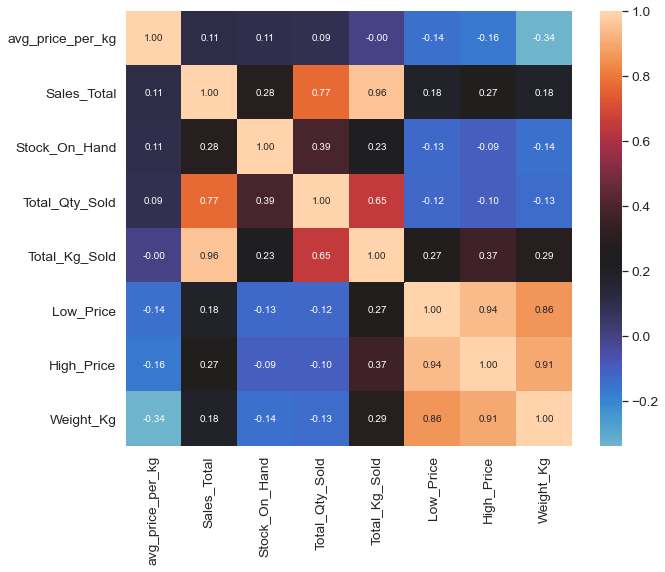

In [151]:
plt.figure(figsize=(10,8))

#avg_price_per_kg correlation matrix
cols = train.corr().nlargest(10, 'avg_price_per_kg')['avg_price_per_kg'].index
corr_mat = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)

#Plot corr matrix
sns.heatmap(corr_mat, annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, center=0.25)
plt.show()

In [152]:
# Taking a look at how our numerical features correlate with our target 
corrs_numerical = pd.DataFrame(train.corr()['avg_price_per_kg']).rename(columns = {'avg_price_per_kg':'Correlation'})
corrs_numerical.sort_values(by='Correlation',ascending=False, inplace=True)
corrs_numerical.head(10)

Correlation
avg_price_per_kg     1.000000
Sales_Total          0.108473
Stock_On_Hand        0.105028
Total_Qty_Sold       0.087536
Total_Kg_Sold       -0.001007
Low_Price           -0.141740
High_Price          -0.164496
Weight_Kg           -0.337886

Judging from the above results, the strongest correlation are Weight, Low Price and High Price (even though  it is a negative relationship)

### Visualising the corelation between the target varible and predictor variables 

In [153]:
# Encoding categorical features with dummy variables to observe how they correlate with target 
dummy_df = pd.get_dummies(train[["Province", "Size_Grade", "Container", "Date", "avg_price_per_kg"]])

We didnt inclulde the Commodities columns since we are only focusing on one commodity 

In [154]:
# Taking a look at how our categorical features correlate with our target 
corrs_categorical = pd.DataFrame(dummy_df.corr()['avg_price_per_kg']).rename(columns = {'avg_price_per_kg':'Correlation'})
corrs_categorical.sort_values(by='Correlation',ascending=False, inplace=True)
corrs_categorical.head(10)

Correlation
avg_price_per_kg                  1.000000
Container_M4183                   0.403229
Size_Grade_1L                     0.280966
Province_W.CAPE-BERGRIVER ETC     0.262051
Size_Grade_1X                     0.251451
Container_EC120                   0.188162
Size_Grade_1M                     0.175779
Container_EF120                   0.114297
Date_2019-12-12                   0.097705
Province_CAPE                     0.086135

Judging from the above results, the Container, Size Grade has an impact on the target variable.

## 2.2 Identifying outliers 

<AxesSubplot:xlabel='avg_price_per_kg'>

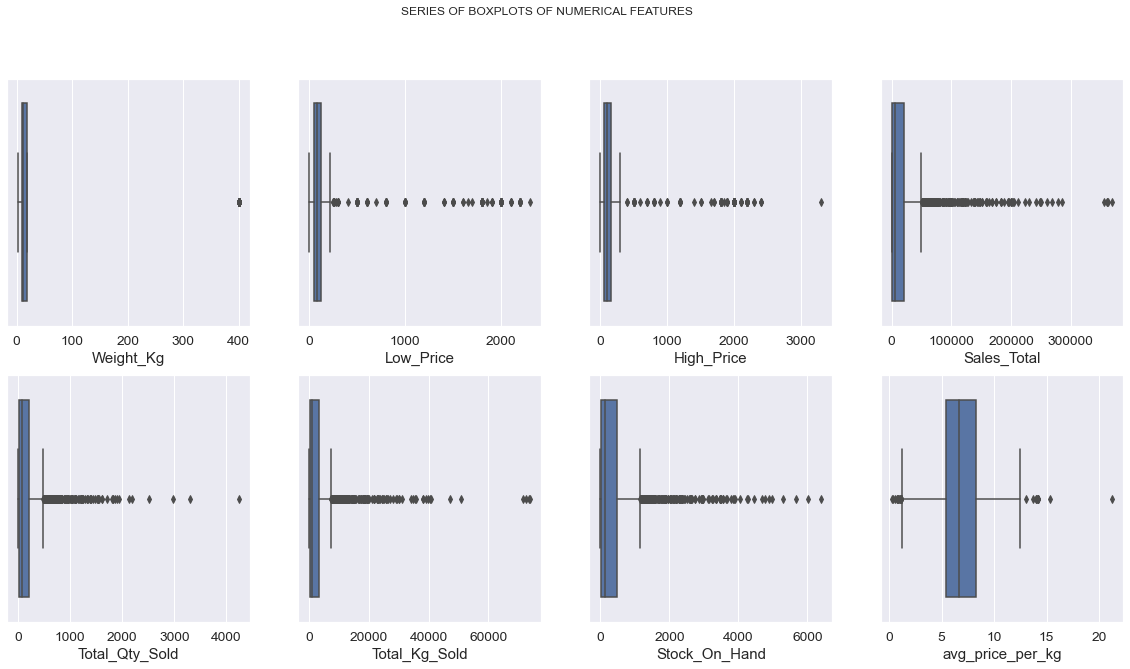

In [77]:
# Visualizing the outliers using boxplot graph 
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

fig.suptitle('SERIES OF BOXPLOTS OF NUMERICAL FEATURES')

sns.boxplot(ax=axes[0, 0], data=train, x='Weight_Kg')
sns.boxplot(ax=axes[0, 1], data=train, x='Low_Price')
sns.boxplot(ax=axes[0, 2], data=train, x='High_Price')
sns.boxplot(ax=axes[0, 3], data=train, x='Sales_Total')
sns.boxplot(ax=axes[1, 0], data=train, x='Total_Qty_Sold')
sns.boxplot(ax=axes[1, 1], data=train, x='Total_Kg_Sold')
sns.boxplot(ax=axes[1, 2], data=train, x='Stock_On_Hand')
sns.boxplot(ax=axes[1, 3], data=train, x='avg_price_per_kg')

In [78]:
# Checking the kurtosis of our data
train.kurtosis()

Weight_Kg            9.109698
Low_Price           17.073369
High_Price          13.630768
Sales_Total         24.200524
Total_Qty_Sold      32.338123
Total_Kg_Sold       45.153801
Stock_On_Hand       14.671224
avg_price_per_kg     1.042921
dtype: float64

In [79]:
# Checking the skewness of our data 
train.skew()

Weight_Kg           3.328254
Low_Price           4.222672
High_Price          3.828819
Sales_Total         4.250317
Total_Qty_Sold      4.445169
Total_Kg_Sold       5.529586
Stock_On_Hand       3.391815
avg_price_per_kg    0.082452
dtype: float64

In [80]:
# Calculating the z-score the following columns
z_scores = stats.zscore(train[['Weight_Kg','Low_Price','High_Price','Sales_Total','Total_Qty_Sold','Total_Kg_Sold','Stock_On_Hand']])
z_scores

array([[-0.22243292, -0.06508733, -0.10531693, ...,  0.51011687,
         0.51107251,  0.57107005],
       [-0.29570429, -0.33285514, -0.38217499, ...,  0.47124817,
         0.09183678, -0.56387366],
       [-0.31577864, -0.31946675, -0.37063924, ..., -0.50694751,
        -0.45902938,  1.51547577],
       ...,
       [-0.31577864, -0.33285514, -0.35910349, ..., -0.27697435,
        -0.35420405,  0.53102946],
       [-0.29570429, -0.38640871, -0.4052465 , ..., -0.33851646,
        -0.35928947, -0.56387366],
       [-0.28566712, -0.23110338, -0.25758886, ..., -0.21219318,
        -0.27103277, -0.47136609]])

In [81]:
# Removing outliers using the z-scores
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
train = train[filtered_entries]

In [82]:
train.reset_index(inplace=True)
train

index              Province Container Size_Grade  Weight_Kg  \
0         1                  CAPE     M4183         1L       18.3   
1         7                  CAPE     JG110         2M       11.0   
2        24  W.CAPE-BERGRIVER ETC     JE090         2S        9.0   
3        40                  CAPE     M4183         1S       18.3   
4        80                  CAPE     JE090         2S        9.0   
...     ...                   ...       ...        ...        ...   
1718  64276                 NATAL     EC120         1S       12.0   
1719  64291     ORANGE FREE STATE     M4183         1X       18.3   
1720  64297                  CAPE     JE090         2M        9.0   
1721  64304                  CAPE     JG110         2M       11.0   
1722  64310  W.CAPE-BERGRIVER ETC     EC120         1M       12.0   

                 Commodities        Date  Low_Price  High_Price  Sales_Total  \
0     APPLE GOLDEN DELICIOUS  2020-09-09      150.0       170.0      51710.0   
1     APPLE GOLDEN DELICIOUS  2020-04-14       50.0        50.0      16000.0   
2     APPLE GOLDEN DELICIOUS  2020-04-16       55.0        55.0        990.0   
3     APPLE GOLDEN DELICIOUS  2020-05-04       80.0       120.0      32020.0   
4     APPLE GOLDEN DELICIOUS  2020-03-13       55.0        55.0       4840.0   
...                      ...         ...        ...         ...          ...   
1718  APPLE GOLDEN DELICIOUS  2020-03-04       96.0        96.0       1920.0   
1719  APPLE GOLDEN DELICIOUS  2020-02-22      130.0       130.0       7280.0   
1720  APPLE GOLDEN DELICIOUS  2020-04-22       50.0        60.0       4540.0   
1721  APPLE GOLDEN DELICIOUS  2020-03-04       30.0        40.0       2140.0   
1722  APPLE GOLDEN DELICIOUS  2020-04-23       88.0       104.0       9960.0   

      Total_Qty_Sold  Total_Kg_Sold  Stock_On_Hand  avg_price_per_kg  
0                332         6075.6            822              8.51  
1                320         3520.0              0              4.55  
2                 18          162.0           1506              6.11  
3                388         7100.4            443              4.51  
4                 88          792.0            181              6.11  
...              ...            ...            ...               ...  
1718              20          240.0             53              8.00  
1719              56         1024.8             74              7.10  
1720              89          801.0            793              5.67  
1721              70          770.0              0              2.78  
1722             109         1308.0             67              7.61  

[1723 rows x 14 columns]

## 3. Feature engineering and selection

Based on our findings regarding the correlations, we will select the features that had the strongest relationship with target

In [155]:
dummy_df = pd.get_dummies(train[["Size_Grade", "Container"]])

In [156]:
# merge with main df on key values
train = pd.concat([train, dummy_df], axis=1)
train.head()

Province Container Size_Grade  Weight_Kg  \
1                   CAPE     M4183         1L       18.3   
7                   CAPE     JG110         2M       11.0   
24  W.CAPE-BERGRIVER ETC     JE090         2S        9.0   
40                  CAPE     M4183         1S       18.3   
69          EASTERN CAPE     IA400         1S      400.0   

               Commodities        Date  Low_Price  High_Price  Sales_Total  \
1   APPLE GOLDEN DELICIOUS  2020-09-09      150.0       170.0      51710.0   
7   APPLE GOLDEN DELICIOUS  2020-04-14       50.0        50.0      16000.0   
24  APPLE GOLDEN DELICIOUS  2020-04-16       55.0        55.0        990.0   
40  APPLE GOLDEN DELICIOUS  2020-05-04       80.0       120.0      32020.0   
69  APPLE GOLDEN DELICIOUS  2020-09-28     1800.0      1800.0       1800.0   

    Total_Qty_Sold  ...  Container_DT063  Container_EC120  Container_EF120  \
1              332  ...                0                0                0   
7              320  ...                0                0                0   
24              18  ...                0                0                0   
40             388  ...                0                0                0   
69               1  ...                0                0                0   

    Container_EG140  Container_IA400  Container_JE090  Container_JG110  \
1                 0                0                0                0   
7                 0                0                0                1   
24                0                0                1                0   
40                0                0                0                0   
69                0                1                0                0   

    Container_M4183  Container_M6125  Container_M9125  
1                 1                0                0  
7                 0                0                0  
24                0                0                0  
40                1                0                0  
69                0                0                0  

[5 rows x 34 columns]

In [157]:
train.drop(columns=["Size_Grade", "Container"], axis=1, inplace=True)

In [158]:
train.columns

Index(['Province', 'Weight_Kg', 'Commodities', 'Date', 'Low_Price',
       'High_Price', 'Sales_Total', 'Total_Qty_Sold', 'Total_Kg_Sold',
       'Stock_On_Hand', 'avg_price_per_kg', 'Size_Grade_1L', 'Size_Grade_1M',
       'Size_Grade_1S', 'Size_Grade_1U', 'Size_Grade_1X', 'Size_Grade_2L',
       'Size_Grade_2M', 'Size_Grade_2S', 'Size_Grade_2U', 'Size_Grade_2X',
       'Container_AC030', 'Container_DT063', 'Container_EC120',
       'Container_EF120', 'Container_EG140', 'Container_IA400',
       'Container_JE090', 'Container_JG110', 'Container_M4183',
       'Container_M6125', 'Container_M9125'],
      dtype='object')

## 4. Model selection and evaluation 

In [266]:
# Function to fit data, make predictions, and evaluate model
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_pred,y_test))

def r_squared(y_test, y_pred):
    return r2_score(y_test, y_pred)
    
# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model,X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = rmse(y_train, train_pred)
    test_rmse = rmse(y_test, test_pred)
    
    train_r2 = r_squared(y_train, train_pred)
    test_r2 = r_squared(y_test, test_pred)
    
    df = {'Train RMSE': train_rmse,'Train R^2':train_r2,'Test RMSE': test_rmse,'Test R^2':test_r2}
    
    return df

### 4.1 Basic linear regression model

In [244]:
model = LinearRegression(n_jobs=-1)
y = train['avg_price_per_kg']
y.shape

(1952,)

In [245]:
X = train[['Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold', 'Total_Kg_Sold', 'Stock_On_Hand', 'avg_price_per_kg','Container_M4183', 'Size_Grade_1L']].values
fit_and_evaluate(model,X,y)

{'Train RMSE': 6.157405053760308e-14,
 'Train R^2': 1.0,
 'Test RMSE': 5.765650108621439e-14,
 'Test R^2': 1.0}

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=4)
model.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

### 4.2 Random Forest Regression

In [278]:
model = RandomForestRegressor(n_estimators=10, random_state=42)

In [279]:
fit_and_evaluate(model, X_train, y_train)

{'Train RMSE': 0.24266329421437918,
 'Train R^2': 0.9877310274165463,
 'Test RMSE': 0.9132812450652096,
 'Test R^2': 0.8651612210837274}

In [280]:
train.shape

(1952, 13)

In [281]:
X = train[['Weight_Kg', 'Low_Price','High_Price','Sales_Total','Total_Qty_Sold','Total_Kg_Sold','Stock_On_Hand']].values
y=train['avg_price_per_kg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=4)
fit_and_evaluate(model,X,y)

{'Train RMSE': 0.29327465465351704,
 'Train R^2': 0.9833144668091074,
 'Test RMSE': 0.5989771972825427,
 'Test R^2': 0.9226799231745707}

### 4.3 Ridge Regression 

In [ ]:
# Separate the features from the response
X = train[['Weight_Kg','Low_Price','High_Price','Sales_Total','Total_Qty_Sold','Total_Kg_Sold','Sales_Total','avg_price_per_kg']].drop('avg_price_per_kg', axis=1)
y = train['avg_price_per_kg']

In [ ]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

In [ ]:
# Create standardization object
scaler = StandardScaler()

In [ ]:
# Save standardized features into new variable
X_scaled = scaler.fit_transform(X)

In [ ]:
# Convert the scaled predictor values into a dataframe
X_standardise = pd.DataFrame(X_scaled,columns=X.columns)
X_standardise.head()

In [ ]:
# Import train/test splitting function from sklearn
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data into train and test, being sure to use the standardised predictors
X_train, X_test, y_train, y_test = train_test_split(X_standardise, 
                                                    y, 
                                                    test_size=0.2, 
                                                    shuffle=False)

In [ ]:
# Import the ridge regression module from sklearn
from sklearn.linear_model import Ridge

In [ ]:
# Create ridge model
ridge = Ridge()

In [ ]:
# Train the model
ridge.fit(X_train, y_train)

In [ ]:
# Extract the model intercept value
b0 = float(ridge.intercept_)

In [ ]:
# Extract the model coefficient value
coeff = pd.DataFrame(ridge.coef_, X.columns, columns=['Coefficient'])

In [ ]:
print("Intercept:", float(b0))

In [ ]:
# Check out the coefficients
coeff

In [ ]:
# Fit a basic linear model
from sklearn.linear_model import LinearRegression

# Create model object
model = LinearRegression()

# Train model
model.fit(X_train, y_train)

In [ ]:
# Import metrics module
from sklearn import metrics

In [ ]:
# Check training accuracy
train_model = model.predict(X_train)
train_ridge = ridge.predict(X_train)

In [164]:
fit_and_evaluate(model,X,y)

{'Train RMSE': 1.8029960581006488,
 'Train R^2': 0.36936135627478117,
 'Test RMSE': 1.719023108520348,
 'Test R^2': 0.36315296983727763}

### 4.4 Lasso Regression

In [ ]:
# Separate the features from the response
X = train[['Weight_Kg','Low_Price','High_Price','Sales_Total','Total_Qty_Sold','Total_Kg_Sold','Sales_Total','avg_price_per_kg']].drop('avg_price_per_kg', axis=1)
y = train['avg_price_per_kg']

In [ ]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

In [ ]:
# Create standardization object
scaler = StandardScaler()

In [ ]:
# Save standardized features into new variable
X_scaled = scaler.fit_transform(X)

In [ ]:
# Import train/test split module
from sklearn.model_selection import train_test_split

In [ ]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, 
                                                    test_size=0.20,
                                                    random_state=1,
                                                    shuffle=False)

In [ ]:
# Import LASSO module
from sklearn.linear_model import Lasso

In [ ]:
# Create LASSO model object, setting alpha to 0.01
lasso = Lasso(alpha=0.01)

In [ ]:
# Train the LASSO model
lasso.fit(X_train, y_train)

In [ ]:
# Extract intercept from model
intercept = float(lasso.intercept_)

In [ ]:
# Extract coefficient from model
coeff = pd.DataFrame(lasso.coef_, X.columns, columns=['Coefficient'])

In [ ]:
# Extract intercept
print("Intercept:", float(intercept))

In [ ]:
coeff

In [ ]:
# convert the scaled predictor values into a dataframe
X_standardise = pd.DataFrame(X_scaled,columns=X.columns)
X_standardise.head()

In [ ]:
plt.hist(X_standardise['High_Price'])
plt.show()

In [181]:
X_standardise.describe().loc['std']

Weight_Kg         1.000256
Low_Price         1.000256
High_Price        1.000256
Sales_Total       1.000256
Total_Qty_Sold    1.000256
Total_Kg_Sold     1.000256
Sales_Total       1.000256
Name: std, dtype: float64

In [182]:
# Fit a basic linear model
from sklearn.linear_model import LinearRegression, Ridge

X_subset = train.drop(['Province', 'Container', 'Size_Grade', 'Date', 'Commodities'], axis=1)

X_subset_scaled = scaler.fit_transform(X_subset)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_subset, 
                                                        y, 
                                                        test_size=0.20, 
                                                        random_state=1,
                                                        shuffle=False)

# Least squares using non-zero variables from LASSO
model_subset = LinearRegression()

# Least squares using all predictors
model_all = LinearRegression()

# Ridge using all predictors
ridge = Ridge()


In [183]:
fit_and_evaluate(model_subset,X_train2, y_train2)

{'Train RMSE': 6.464646907830799e-14,
 'Train R^2': 1.0,
 'Test RMSE': 6.454609359088699e-14,
 'Test R^2': 1.0}

In [184]:
fit_and_evaluate(model_all,X_train, y_train)

{'Train RMSE': 1.7729855990313965,
 'Train R^2': 0.3701881712235534,
 'Test RMSE': 1.7308629410476393,
 'Test R^2': 0.38754515877113527}

In [185]:
fit_and_evaluate(ridge,X_train, y_train)

{'Train RMSE': 1.773115580987616,
 'Train R^2': 0.37009582171498245,
 'Test RMSE': 1.732187486595205,
 'Test R^2': 0.38660743607902837}

### 4.5 Gradient Boosting Regression

In [ ]:
# Gradient Boosting Regressor
model = GradientBoostingRegressor(max_depth=4, n_estimators=200, random_state=2)

In [ ]:
fit_and_evaluate(model,X,y)

## 4.6 XGBoost

## 5. Model results

In [272]:
test.shape, train.shape

((685, 12), (1952, 13))

In [166]:
dummy_df1 = pd.get_dummies(test[["Size_Grade", "Container"]])

In [167]:
# merge with main df on key values
test = pd.concat([test, dummy_df1], axis=1)
test.head()

Province Container Size_Grade  Weight_Kg  \
0  W.CAPE-BERGRIVER ETC     EC120         1M       12.0   
1  W.CAPE-BERGRIVER ETC     M4183         1X       18.3   
2  W.CAPE-BERGRIVER ETC     EC120         1S       12.0   
3  W.CAPE-BERGRIVER ETC     M4183         1M       18.3   
4  W.CAPE-BERGRIVER ETC     M4183         1L       18.3   

              Commodities        Date  Low_Price  High_Price  Sales_Total  \
0  APPLE GOLDEN DELICIOUS  2020-07-09      128.0       136.0       5008.0   
1  APPLE GOLDEN DELICIOUS  2020-01-20      220.0       220.0       1760.0   
2  APPLE GOLDEN DELICIOUS  2020-08-19      120.0       120.0        720.0   
3  APPLE GOLDEN DELICIOUS  2020-05-06      160.0       160.0        160.0   
4  APPLE GOLDEN DELICIOUS  2020-05-04      140.0       160.0      14140.0   

   Total_Qty_Sold  ...  Container_DT063  Container_EC120  Container_EF120  \
0              38  ...                0                1                0   
1               8  ...                0                0                0   
2               6  ...                0                1                0   
3               1  ...                0                0                0   
4             100  ...                0                0                0   

   Container_EG140  Container_IA400  Container_JE090  Container_JG110  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   Container_M4183  Container_M6125  Container_M9125  
0                0                0                0  
1                1                0                0  
2                0                0                0  
3                1                0                0  
4                1                0                0  

[5 rows x 33 columns]

In [168]:
test.drop(columns=["Size_Grade", "Container"], axis=1, inplace=True)

In [169]:
test.columns

Index(['Province', 'Weight_Kg', 'Commodities', 'Date', 'Low_Price',
       'High_Price', 'Sales_Total', 'Total_Qty_Sold', 'Total_Kg_Sold',
       'Stock_On_Hand', 'Size_Grade_1L', 'Size_Grade_1M', 'Size_Grade_1S',
       'Size_Grade_1U', 'Size_Grade_1X', 'Size_Grade_2L', 'Size_Grade_2M',
       'Size_Grade_2S', 'Size_Grade_2U', 'Size_Grade_2X', 'Container_AC030',
       'Container_DT063', 'Container_EC120', 'Container_EF120',
       'Container_EG140', 'Container_IA400', 'Container_JE090',
       'Container_JG110', 'Container_M4183', 'Container_M6125',
       'Container_M9125'],
      dtype='object')

In [282]:
# save the model
import pickle

model_load_path= "model.pkl"
with open(model_load_path, 'wb') as file:
    pickle.dump(model, file)

with open(model_load_path,'rb') as file:
    mod = pickle.load(file)

In [283]:
preds = mod.predict(test[['Weight_Kg', 'Low_Price','High_Price','Sales_Total','Total_Qty_Sold','Total_Kg_Sold','Stock_On_Hand']].values)

In [284]:
submission = pd.DataFrame(
    {'Index': index,
     'avg_price_per_kg': preds
    })

In [285]:
submission.head(10)

Index  avg_price_per_kg
0      1            10.619
1      2            11.866
2      3            10.000
3      4             8.740
4      5             8.161
5      6             4.598
6      7             3.738
7      8             6.901
8      9             8.985
9     10             9.290

In [277]:
submission.to_csv("submission.csv", index=False)

## 6. Conclusion